In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.10.1


Import dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# len(class_names)

In [5]:
#60,000 images in the training set, with each image represented as 28 x 28 pixels
train_images.shape 

(60000, 28, 28)

In [6]:
len(train_images)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

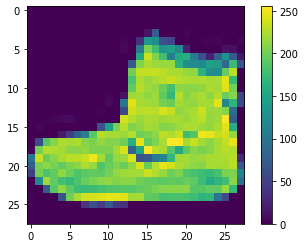

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

let's display the first 25 images from the training set and display the class name below each image.

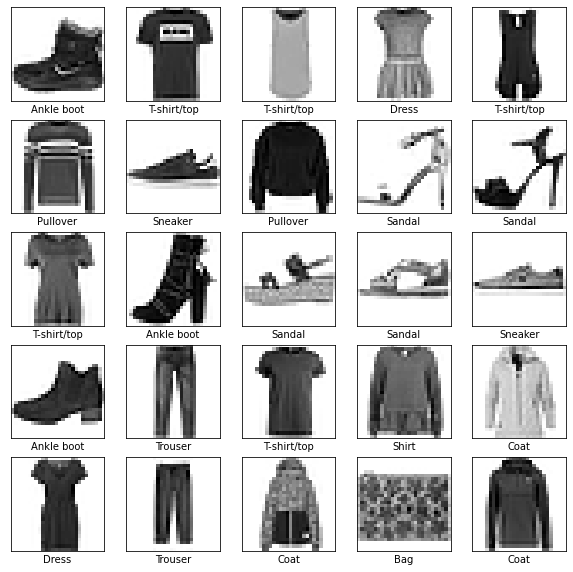

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # here cmap=plt.cm.binary means image will show in black and white
    plt.xlabel(class_names[train_labels[i]])

# Build the model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [15]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4945 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.3758 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3369 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3124 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.2934 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 2s 947us/step - loss: 0.2807 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.2668 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.2577 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 965us/step - loss: 0.2481 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 961us/step

## Evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

313/313 - 0s - loss: 0.3391 - accuracy: 0.8802 - 328ms/epoch - 1ms/step

Test accuracy 0.8802000284194946


## Make Predictions

In [17]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [18]:
prediction = probability_model.predict(test_images)

313/313 [==============================] - 0s 565us/step


In [19]:
prediction[0]

array([3.9065728e-07, 1.2986043e-08, 5.0068815e-07, 6.6174427e-10,
       4.0153861e-08, 6.5098786e-05, 5.9891386e-07, 1.2613557e-02,
       1.6914000e-09, 9.8731983e-01], dtype=float32)

In [20]:
#which label has the highest confidence value
np.argmax(prediction[0])

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
        
    

# Verify prediction

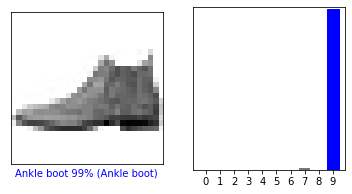

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

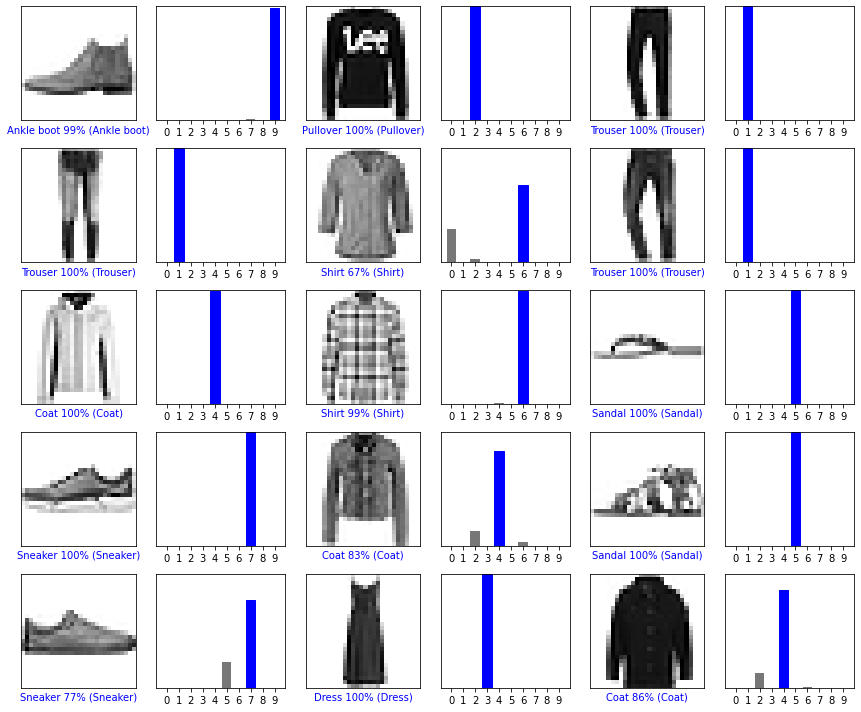

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(test_images[1],0))

print(img.shape)

(1, 28, 28)


In [25]:
prediction_single = probability_model.predict(img)
print(prediction_single)

1/1 [==============================] - 0s 17ms/step
[[5.5845412e-06 1.0682450e-12 9.9934250e-01 1.1273861e-08 3.9061077e-04
  4.1193942e-13 2.6126413e-04 1.1177312e-13 1.4620366e-10 8.0527571e-18]]


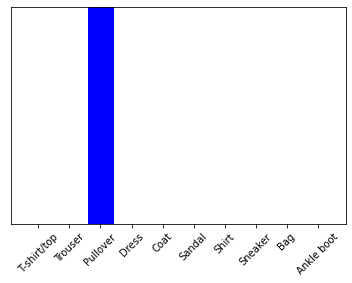

In [26]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [27]:
np.argmax(prediction_single[0])

2